# Wine Quality

#### Kaggle dataset https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

## Prepare Data

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('train.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Explore

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.duplicated().sum()

240

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


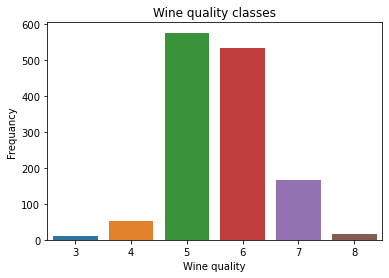

In [7]:
# Wine quality classes frequancy
sns.countplot(x= df['quality'])
plt.xlabel('Wine quality')
plt.ylabel('Frequancy')
plt.title('Wine quality classes');

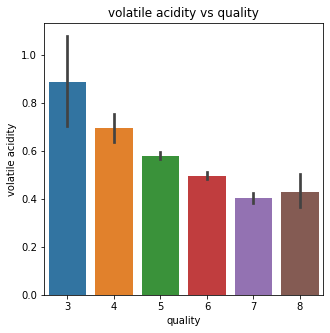

In [8]:
#Relation between volatile acidity vs quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality' , y= 'volatile acidity' , data= df )
plt.title('volatile acidity vs quality');

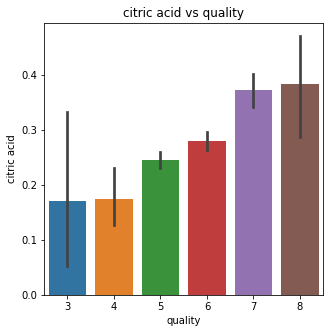

In [9]:
#Relation between citric acid vs quality
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality' , y= 'citric acid' , data= df )
plt.title('citric acid vs quality');

### Correlation

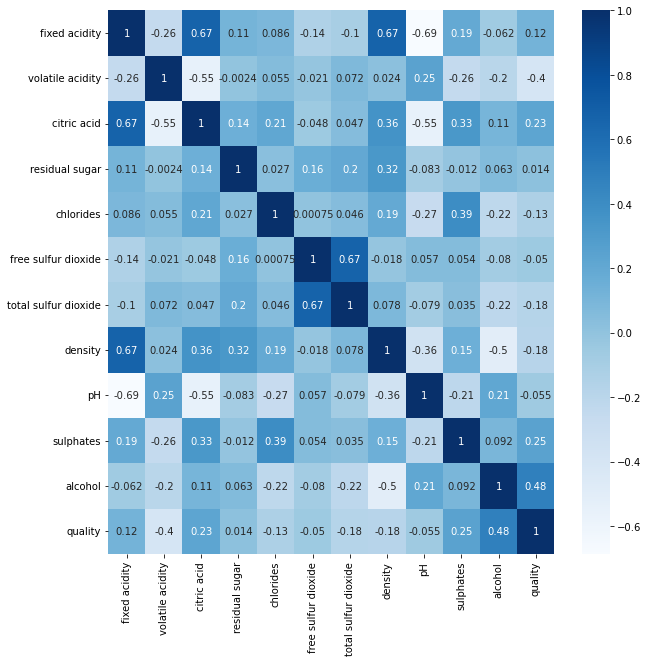

In [10]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr ,annot=True , cmap= 'Blues');

## Split Data

In [11]:
X = df.drop(columns= ['quality'])
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


### Label Binarization

In [12]:
y = (df['quality'] > 6).astype(int)
y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int32

In [13]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (1359, 11)
y shape: (1359,)


### Train & Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1087, 11)
y_train shape: (1087,)
X_test shape: (272, 11)
y_test shape: (272,)


## Build Baseline

In [16]:
acc_baseline = y.value_counts(normalize= True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.8646


## Iterate

## KNeighborsClassifier

In [17]:
k_neighbors = range(2 , 11 , 2)
Training_acc = []
Testing_acc = []

for i in k_neighbors:
    
    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(X_train , y_train)
    Training_acc.append(model.score(X_train , y_train))
    Testing_acc.append(model.score(X_test , y_test))
    
print(f'Training accuracy: f{Training_acc}')
print(f'Testing accuracy: f{Testing_acc}')

Training accuracy: f[0.9098436062557498, 0.8822447102115916, 0.8831646734130635, 0.8693652253909844, 0.8666053357865685]
Testing accuracy: f[0.8823529411764706, 0.8897058823529411, 0.8786764705882353, 0.875, 0.875]


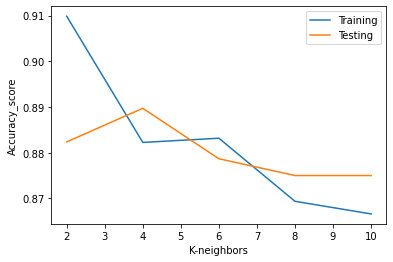

In [18]:
# Plot `k_neighbors`, `training_acc`
plt.plot(k_neighbors , Training_acc , label= 'Training')
plt.plot(k_neighbors , Testing_acc , label= 'Testing')
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy_score')
plt.legend();

Based on the visualization the best parameter for n_neighbors is 4

In [19]:
final_model = KNeighborsClassifier(n_neighbors= 4)

In [20]:
final_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4)

In [21]:
print(f'Training accuracy: f{final_model.score(X_train , y_train)}')
print(f'Testing accuracy: f{final_model.score(X_test , y_test)}')

Training accuracy: f0.8822447102115916
Testing accuracy: f0.8897058823529411


## RandomForestClassifier

In [22]:
clf = RandomForestClassifier(random_state= 42)

In [23]:
params = {
    'max_depth': range(10 , 60 , 10),
    'n_estimators': range(25 , 100 , 25)
}
params

{'max_depth': range(10, 60, 10), 'n_estimators': range(25, 100, 25)}

In [24]:
rfc_model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose=1
)
rfc_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [25]:
rfc_model.fit(X_train , y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [26]:
cv_results = pd.DataFrame(rfc_model.cv_results_)
cv_results.sort_values(by= 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.130112,0.015404,0.008001,0.000634,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.889908,0.866972,0.903226,0.843318,0.866359,0.873957,0.020767,1
7,0.131035,0.012340,0.008503,0.001413,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.889908,0.866972,0.903226,0.843318,0.866359,0.873957,0.020767,1
10,0.121021,0.012736,0.008829,0.002619,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.889908,0.866972,0.903226,0.843318,0.866359,0.873957,0.020767,1
13,0.111301,0.005160,0.007104,0.000799,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.889908,0.866972,0.903226,0.843318,0.866359,0.873957,0.020767,1
5,0.196369,0.018499,0.012505,0.002788,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.889908,0.848624,0.894009,0.847926,0.866359,0.869365,0.019638,5
8,0.173444,0.009816,0.010335,0.000381,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.889908,0.848624,0.894009,0.847926,0.866359,0.869365,0.019638,5
11,0.170474,0.008453,0.010799,0.000399,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.889908,0.848624,0.894009,0.847926,0.866359,0.869365,0.019638,5
14,0.137800,0.012514,0.006001,0.000003,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.889908,0.848624,0.894009,0.847926,0.866359,0.869365,0.019638,5
3,0.060373,0.002838,0.005002,0.000004,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.894495,0.853211,0.889401,0.843318,0.866359,0.869357,0.019907,9
6,0.062769,0.008563,0.005229,0.000384,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.894495,0.853211,0.889401,0.843318,0.866359,0.869357,0.019907,9


In [27]:
rfc_model.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [28]:
rfc_model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## ConfusionMatrix

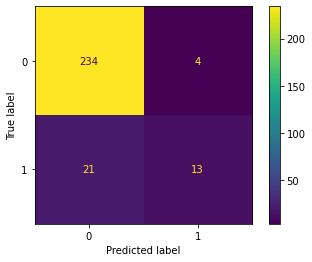

In [29]:
ConfusionMatrixDisplay.from_estimator(
    rfc_model,
    X_test,
    y_test
);

## a Classification report to look at the whole picture of the classification model performances. A classification report includes precision, recall, F1 score and support.

In [30]:
print(
    classification_report(y_test,
                          rfc_model.predict(X_test)
                         )
)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       238
           1       0.76      0.38      0.51        34

    accuracy                           0.91       272
   macro avg       0.84      0.68      0.73       272
weighted avg       0.90      0.91      0.89       272



## GradientBoostingClassifier

In [31]:
clf = GradientBoostingClassifier(random_state= 42)

In [32]:
params = {
    'n_estimators': range(25 , 125 , 25),
    'max_depth': range(3 , 45 , 10)
}
params

{'n_estimators': range(25, 125, 25), 'max_depth': range(3, 45, 10)}

In [33]:
gbc = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs=-1,
    verbose=1
)
gbc

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 45, 10),
                         'n_estimators': range(25, 125, 25)},
             verbose=1)

In [34]:
gbc.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 45, 10),
                         'n_estimators': range(25, 125, 25)},
             verbose=1)

In [35]:
cv_results = pd.DataFrame(gbc.cv_results_)
cv_results.sort_values(by= 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050183,0.001466,0.002003,0.000003,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.866972,0.853211,0.870968,0.866359,0.866359,0.864774,0.006032,1
1,0.103914,0.006152,0.002199,0.000400,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.885321,0.834862,0.870968,0.861751,0.861751,0.862931,0.016471,2
2,0.153332,0.005383,0.002401,0.000490,3,75,"{'max_depth': 3, 'n_estimators': 75}",0.880734,0.834862,0.884793,0.857143,0.852535,0.862013,0.018548,3
3,0.219697,0.015774,0.002405,0.000490,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.885321,0.839450,0.880184,0.847926,0.852535,0.861083,0.018257,4
4,0.180783,0.020283,0.002399,0.000489,13,25,"{'max_depth': 13, 'n_estimators': 25}",0.825688,0.802752,0.838710,0.788018,0.847926,0.820619,0.022274,5
16,0.182117,0.012548,0.002202,0.000399,43,25,"{'max_depth': 43, 'n_estimators': 25}",0.825688,0.802752,0.838710,0.797235,0.820276,0.816932,0.015173,6
8,0.171984,0.009263,0.002002,0.000001,23,25,"{'max_depth': 23, 'n_estimators': 25}",0.825688,0.802752,0.838710,0.797235,0.820276,0.816932,0.015173,6
12,0.172943,0.015409,0.002200,0.000400,33,25,"{'max_depth': 33, 'n_estimators': 25}",0.825688,0.802752,0.838710,0.797235,0.820276,0.816932,0.015173,6
17,0.390907,0.021006,0.002703,0.000601,43,50,"{'max_depth': 43, 'n_estimators': 50}",0.821101,0.798165,0.838710,0.792627,0.811060,0.812332,0.016512,9
15,0.682604,0.042508,0.002704,0.000604,33,100,"{'max_depth': 33, 'n_estimators': 100}",0.821101,0.798165,0.843318,0.788018,0.811060,0.812332,0.019134,9


In [36]:
gbc.best_params_

{'max_depth': 3, 'n_estimators': 25}

In [37]:
gbc.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## ConfusionMatrix

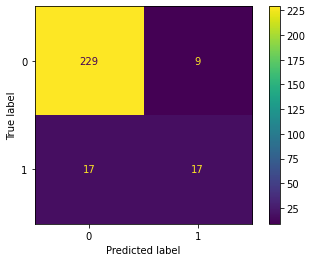

In [38]:
ConfusionMatrixDisplay.from_estimator(
    gbc,
    X_test,
    y_test
);

## Classification Report

In [39]:
print(
    classification_report(
        y_test,
        gbc.predict(X_test)
    )
)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       238
           1       0.65      0.50      0.57        34

    accuracy                           0.90       272
   macro avg       0.79      0.73      0.76       272
weighted avg       0.90      0.90      0.90       272



In [40]:
models = {
    "model" : ['KNeighborsClassifier' , 'RandomForestClassifier' , 'GradientBoostingClassifier'],
    "Score": [final_model.score(X_test , y_test) ,rfc_model.score(X_test , y_test) , gbc.score(X_test , y_test) ]
}
models

{'model': ['KNeighborsClassifier',
  'RandomForestClassifier',
  'GradientBoostingClassifier'],
 'Score': [0.8897058823529411, 0.9080882352941176, 0.9044117647058824]}

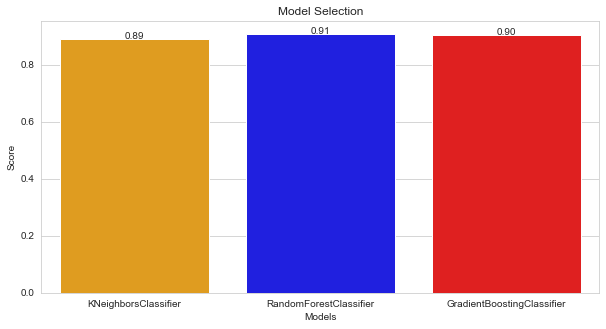

In [41]:
colors= ['orange' , 'blue','red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=models['model'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")

# Add value labels to each bar
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=p.get_height(),
            s='{:.2f}'.format(p.get_height()),
            ha='center')

plt.show();

based on the visualization it`s clear that Random Forest Classifier has the best performance

## Thanks